In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')


ValueError: mount failed

In [ ]:
from logging import error
import pandas as pd
ruta = "/content/drive/MyDrive/Clases/7mo Semestre/archivos/advwork.csv"
df = pd.read_csv(ruta)

print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Clases/7mo Semestre/archivos/advwork.csv'

In [ ]:
print(df.shape)

(37973, 19)


In [ ]:

column_names = ['SalesOrderID','SalesOrderDetailID','CarrierTrackingNumber', 'OrderQty','ProductID','ProductName','CustomerID','SpecialOfferID','UnitPrice','UnitPriceDiscount','LineTotal','rowguid','ModifiedDate','OrderDate','ShipDate','ShipMethodName','FullName','RegionName','Profit']  # Reemplaza con los nombres que desees

df.columns = column_names

In [ ]:
df.head()

,SalesOrderID,SalesOrderDetailID,CarrierTrackingNumber,OrderQty,ProductID,ProductName,CustomerID,SpecialOfferID,UnitPrice,UnitPriceDiscount,LineTotal,rowguid,ModifiedDate,OrderDate,ShipDate,ShipMethodName,FullName,RegionName,Profit
0,43701,357,NaN,1,773,"Mountain-100 Silver, 44",11003,1,3399.9900,0.0,3399.9900,5FF3B05F-57F0-4885-8E7B-64C4AD71AEB5,2011-05-31 00:00:00.000,2011-05-31 00:00:00.000,2011-06-07 00:00:00.000,XRQ - TRUCK GROUND,Jenna W Young,New South Wales,1487.8356
1,43703,359,NaN,1,749,"Road-150 Red, 62",16624,1,3578.2700,0.0,3578.2700,5F95A4EF-CDC3-45BA-8E9C-5D15AFC4D092,2011-06-01 00:00:00.000,2011-06-01 00:00:00.000,2011-06-08 00:00:00.000,XRQ - TRUCK GROUND,Nichole A Goel,South Australia,1406.9758
2,43704,360,NaN,1,778,"Mountain-100 Black, 48",11005,1,3374.9900,0.0,3374.9900,4210CC33-1BD2-4E4F-A9C5-5344C8F63324,2011-06-01 00:00:00.000,2011-06-01 00:00:00.000,2011-06-08 00:00:00.000,XRQ - TRUCK GROUND,Joe Madan,Queensland,1476.8956
3,43705,361,NaN,1,771,"Mountain-100 Silver, 38",11011,1,3399.9900,0.0,3399.9900,9E893BD4-7893-425E-AEE0-82267A55F3FB,2011-06-01 00:00:00.000,2011-06-01 00:00:00.000,2011-06-08 00:00:00.000,XRQ - TRUCK GROUND,Joe D Rana,Queensland,1487.8356
4,43708,364,NaN,1,764,"Road-650 Red, 52",20042,1,699.0982,0.0,699.0982,4C2E3D04-EAE5-4AC7-B1E2-CB536207484F,2011-06-02 00:00:00.000,2011-06-02 00:00:00.000,2011-06-09 00:00:00.000,XRQ - TRUCK GROUND,Donald Raman,England,212.3916


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37973 entries, 0 to 37972
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SalesOrderID           37973 non-null  int64  
 1   SalesOrderDetailID     37973 non-null  int64  
 2   CarrierTrackingNumber  0 non-null      float64
 3   OrderQty               37973 non-null  int64  
 4   ProductID              37973 non-null  int64  
 5   ProductName            37973 non-null  object 
 6   CustomerID             37973 non-null  int64  
 7   SpecialOfferID         37973 non-null  int64  
 8   UnitPrice              37973 non-null  float64
 9   UnitPriceDiscount      37973 non-null  float64
 10  LineTotal              37973 non-null  float64
 11  rowguid                37973 non-null  object 
 12  ModifiedDate           37973 non-null  object 
 13  OrderDate              37973 non-null  object 
 14  ShipDate               37973 non-null  object 
 15  Sh

In [ ]:
# Verificar valores nulos
print(df.isnull().sum())

# Eliminar columna 'CarrierTrackingNumber' si es irrelevante
df = df.drop(columns=['CarrierTrackingNumber'])

SalesOrderID                 0
SalesOrderDetailID           0
CarrierTrackingNumber    37973
OrderQty                     0
ProductID                    0
ProductName                  0
CustomerID                   0
SpecialOfferID               0
UnitPrice                    0
UnitPriceDiscount            0
LineTotal                    0
rowguid                      0
ModifiedDate                 0
OrderDate                    0
ShipDate                     0
ShipMethodName               0
FullName                     0
RegionName                   0
Profit                       0
dtype: int64


In [ ]:
# Convertir columnas de fechas a tipo datetime
df['ModifiedDate'] = pd.to_datetime(df['ModifiedDate'])
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['ShipDate'] = pd.to_datetime(df['ShipDate'])

In [ ]:
# Eliminar filas duplicadas (si existen)
df = df.drop_duplicates()

In [ ]:
# Revisar si hay valores atípicos en las columnas numéricas
df.describe()

,SalesOrderID,SalesOrderDetailID,OrderQty,ProductID,CustomerID,SpecialOfferID,UnitPrice,UnitPriceDiscount,LineTotal,ModifiedDate,OrderDate,ShipDate,Profit
count,37927.000000,37927.000000,37927.0,37927.000000,37927.000000,37927.000000,37927.00000,37927.0,37927.00000,37927,37927,37927,37927.000000
mean,61685.672239,76129.407098,1.0,846.947425,15223.599705,1.038205,519.36969,0.0,519.36969,2013-11-06 05:21:46.562606848,2013-11-06 05:21:46.562606848,2013-11-13 05:21:46.562607104,211.219764
min,43701.000000,357.000000,1.0,707.000000,11000.000000,1.000000,2.29000,0.0,2.29000,2011-05-31 00:00:00,2011-05-31 00:00:00,2011-06-07 00:00:00,1.433500
25%,55368.000000,56299.500000,1.0,781.000000,12672.500000,1.000000,8.99000,0.0,8.99000,2013-08-30 00:00:00,2013-08-30 00:00:00,2013-09-06 00:00:00,3.123700
50%,61807.000000,78462.000000,1.0,871.000000,14961.000000,1.000000,34.99000,0.0,34.99000,2013-12-09 00:00:00,2013-12-09 00:00:00,2013-12-16 00:00:00,15.643700
75%,68556.000000,100109.000000,1.0,921.000000,17609.000000,1.000000,159.00000,0.0,159.00000,2014-03-19 00:00:00,2014-03-19 00:00:00,2014-03-26 00:00:00,99.534000
max,75123.000000,121317.000000,1.0,999.000000,20777.000000,14.000000,3578.27000,0.0,3578.27000,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-07-07 00:00:00,1487.835600
std,8056.857488,29699.851029,0.0,82.899584,2857.695278,0.263317,970.58937,0.0,970.58937,NaN,NaN,NaN,393.226491


In [ ]:
# Verifica la limpieza aplicada
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37927 entries, 0 to 37972
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SalesOrderID        37927 non-null  int64         
 1   SalesOrderDetailID  37927 non-null  int64         
 2   OrderQty            37927 non-null  int64         
 3   ProductID           37927 non-null  int64         
 4   ProductName         37927 non-null  object        
 5   CustomerID          37927 non-null  int64         
 6   SpecialOfferID      37927 non-null  int64         
 7   UnitPrice           37927 non-null  float64       
 8   UnitPriceDiscount   37927 non-null  float64       
 9   LineTotal           37927 non-null  float64       
 10  rowguid             37927 non-null  object        
 11  ModifiedDate        37927 non-null  datetime64[ns]
 12  OrderDate           37927 non-null  datetime64[ns]
 13  ShipDate            37927 non-null  datetime64[ns]


## ***2. Relaciones entre variables:***

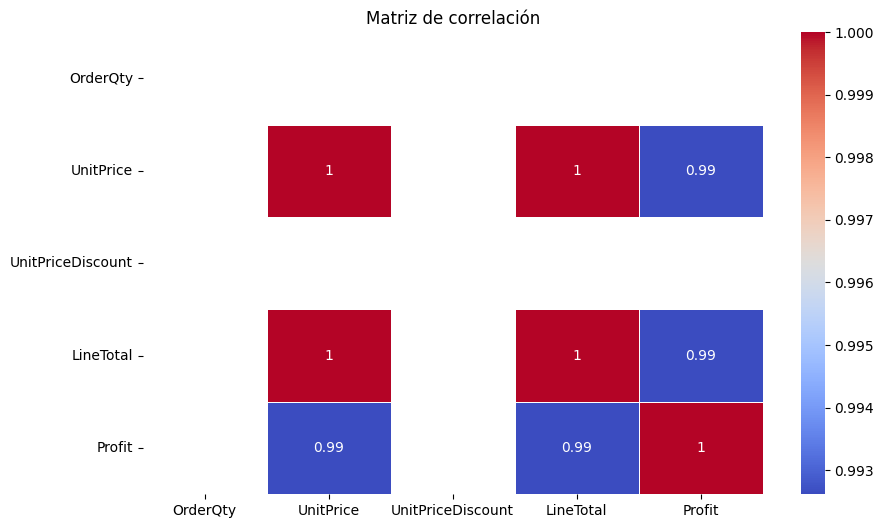

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Matriz de correlación
corr = df[['OrderQty', 'UnitPrice', 'UnitPriceDiscount', 'LineTotal', 'Profit']].corr()

# Mapa de calor para la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()


***Todas las variables tienen una correlación muy fuerte entre sí***

## ***3. Análisis temporal (Ventas por mes):***

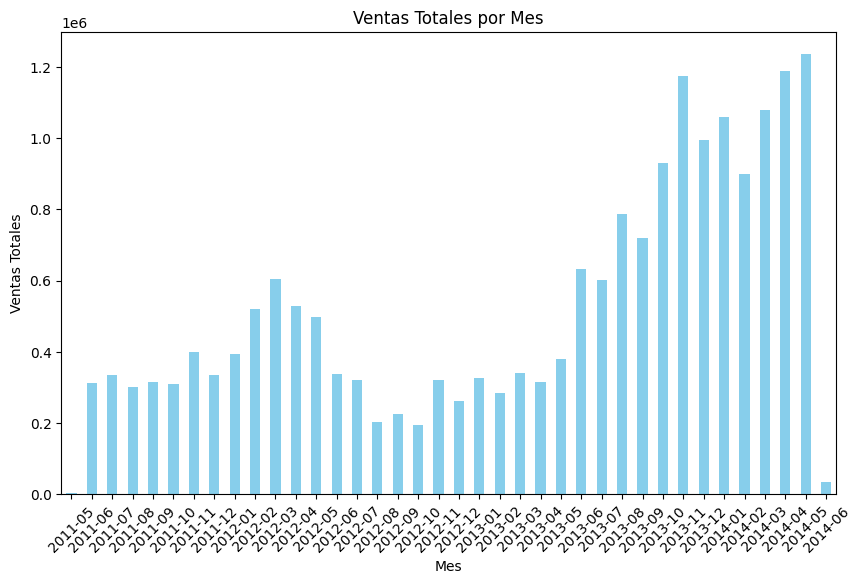

In [ ]:
# Crear columna con el mes del pedido
df['OrderMonth'] = df['OrderDate'].dt.to_period('M')

# Agrupar por mes y calcular ventas totales
sales_per_month = df.groupby('OrderMonth')['LineTotal'].sum()

# Graficar ventas por mes
plt.figure(figsize=(10, 6))
sales_per_month.plot(kind='bar', color='skyblue')
plt.title('Ventas Totales por Mes')
plt.ylabel('Ventas Totales')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.show()


## ***4. Análisis de productos más vendidos:***

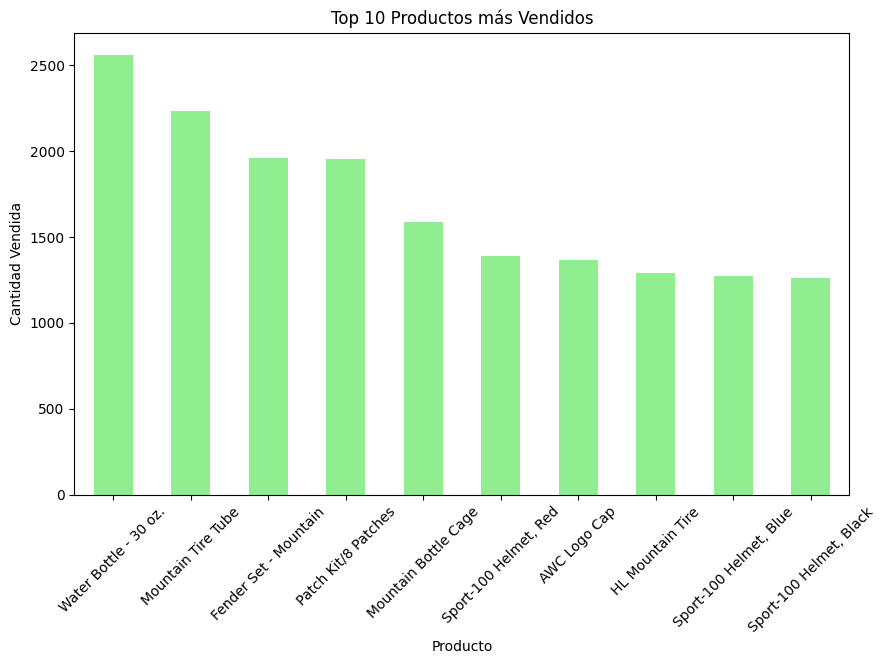

In [ ]:
# Agrupar por 'ProductName' y calcular cantidad total ordenada
top_products = df.groupby('ProductName')['OrderQty'].sum().sort_values(ascending=False).head(10)

# Graficar los 10 productos más vendidos
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Productos más Vendidos')
plt.ylabel('Cantidad Vendida')
plt.xlabel('Producto')
plt.xticks(rotation=45)
plt.show()


* Producto más vendido: El producto que lidera las ventas es la "Water Bottle 30 oz.", con una cantidad considerablemente mayor de unidades vendidas en comparación con el resto.
* Los siguientes productos más populares: Después de la botella de agua, siguen en orden descendente: "Mountain Tire Tube", "Fender Set - Mountain", "Patch Kit/8 Patches", y así sucesivamente hasta el último lugar que ocupa el "Sport-100 Helmet, Black".
* Productos con menor demanda: Los últimos lugares del ranking corresponden a los cascos de diferentes colores (rojo, azul y negro). Aunque siguen siendo productos populares, sus ventas son notablemente inferiores a las de los primeros puestos.
* Tendencia general: Existe una clara diferencia en las ventas entre los primeros productos y los últimos. Esto sugiere que hay una categoría de productos (como la botella de agua y los accesorios para bicicletas) que tiene una demanda mucho mayor que otros.

## ***5. Productos menos Vendidos***

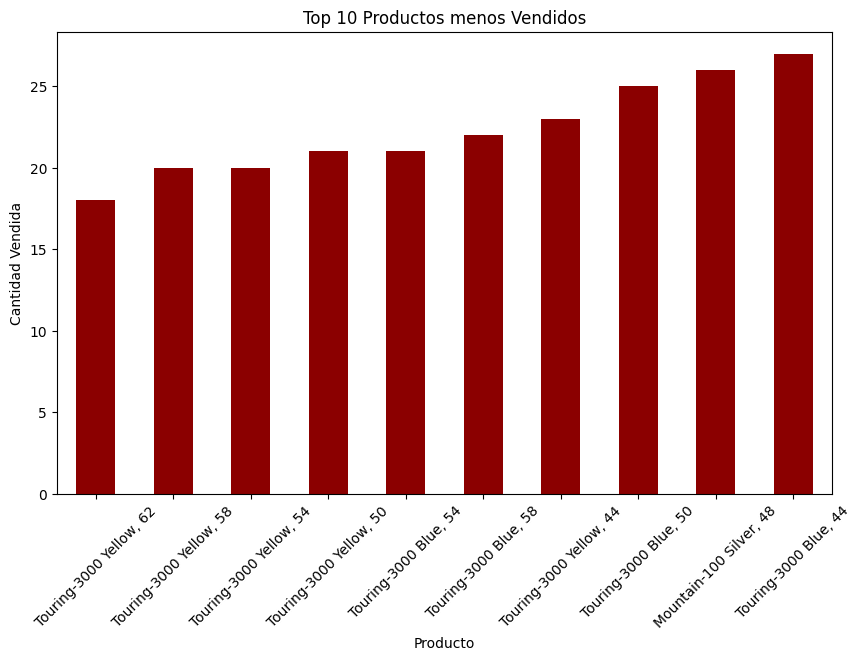

In [ ]:
# Agrupar por 'ProductName' y calcular cantidad total ordenada
top_products = df.groupby('ProductName')['OrderQty'].sum().sort_values(ascending=True).head(10)

# Graficar los 10 productos más vendidos
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='darkred')
plt.title('Top 10 Productos menos Vendidos')
plt.ylabel('Cantidad Vendida')
plt.xlabel('Producto')
plt.xticks(rotation=45)
plt.show()

* Dominancia de un modelo: Lo más llamativo es que casi todos los productos en la lista pertenecen al modelo "Touring-3000", variando únicamente en color. Esto sugiere que podría haber un problema específico con este modelo en particular, ya sea de diseño, marketing, o disponibilidad.
* Poca variación en las ventas: Las cantidades vendidas son relativamente cercanas entre sí, lo que indica que la demanda de estos productos es bastante baja y homogénea.
* Un intruso: El producto "Mountain-100 Silver" destaca por ser el único que no pertenece a la familia Touring-3000. Su inclusión en la lista podría indicar un problema aislado con este producto o simplemente una menor demanda general de bicicletas de montaña en comparación con las de turismo.

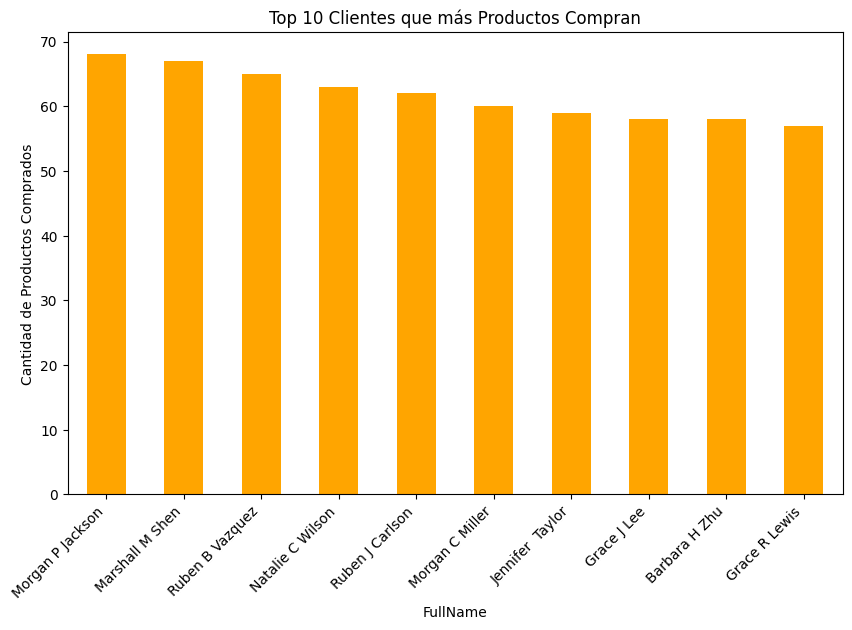

In [ ]:
# Agrupar por 'FullName' y sumar la cantidad total ordenada por cada cliente
top_customers_by_qty = df.groupby('FullName')['OrderQty'].sum().sort_values(ascending=False).head(10)

# Graficar los 10 clientes que más productos han comprado
plt.figure(figsize=(10, 6))
top_customers_by_qty.plot(kind='bar', color='orange')
plt.title('Top 10 Clientes que más Productos Compran')
plt.ylabel('Cantidad de Productos Comprados')
plt.xlabel('FullName')
plt.xticks(rotation=45, ha='right')
plt.show()


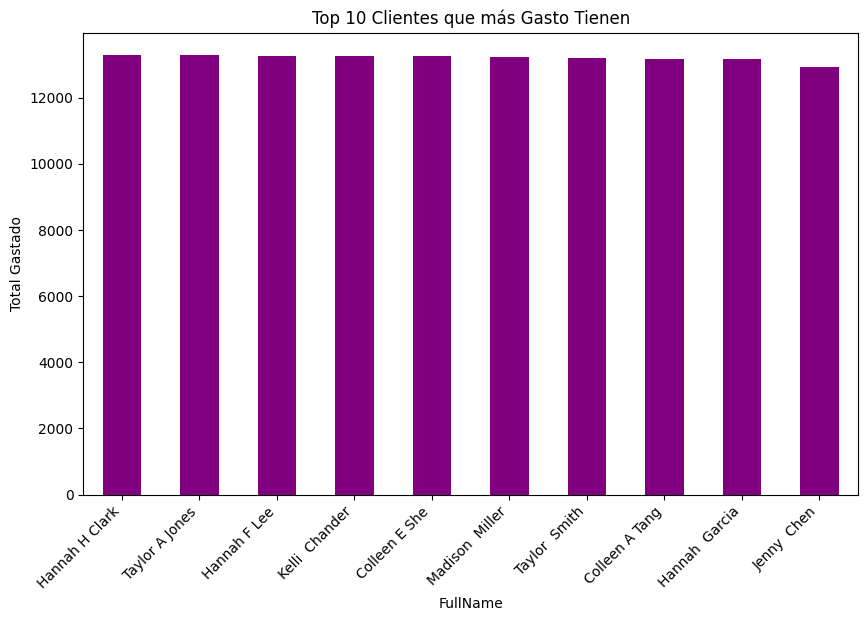

In [ ]:
# Agrupar por 'FullName' y sumar el monto total gastado por cada cliente
top_customers_by_spending = df.groupby('FullName')['LineTotal'].sum().sort_values(ascending=False).head(10)

# Graficar los 10 clientes que más han gastado
plt.figure(figsize=(10, 6))
top_customers_by_spending.plot(kind='bar', color='purple')
plt.title('Top 10 Clientes que más Gasto Tienen')
plt.ylabel('Total Gastado')
plt.xlabel('FullName')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Agrupar por 'FullName' y 'ProductName' para obtener la cantidad de productos comprados por cada cliente
products_by_customers = df.groupby(['FullName', 'ProductName'])['OrderQty'].sum().reset_index()

# Ordenar por 'FullName' y 'OrderQty' en orden descendente para ver los productos más comprados por cada cliente
top_products_by_customers = products_by_customers.sort_values(['FullName', 'OrderQty'], ascending=[True, False])

# Mostrar los productos más comprados por cada cliente (top 10 clientes)
top_10_customers = df['FullName'].value_counts().index[:10]
top_products_by_customers[top_products_by_customers['FullName'].isin(top_10_customers)]


,FullName,ProductName,OrderQty
3015,Barbara H Zhu,Touring Tire Tube,16
3008,Barbara H Zhu,Patch Kit/8 Patches,8
3014,Barbara H Zhu,Touring Tire,7
3005,Barbara H Zhu,LL Road Tire,5
3010,Barbara H Zhu,Road Tire Tube,5
...,...,...,...
31228,Ruben J Carlson,"Half-Finger Gloves, S",1
31232,Ruben J Carlson,"Long-Sleeve Logo Jersey, XL",1
31233,Ruben J Carlson,ML Mountain Tire,1
31235,Ruben J Carlson,Mountain Bottle Cage,1


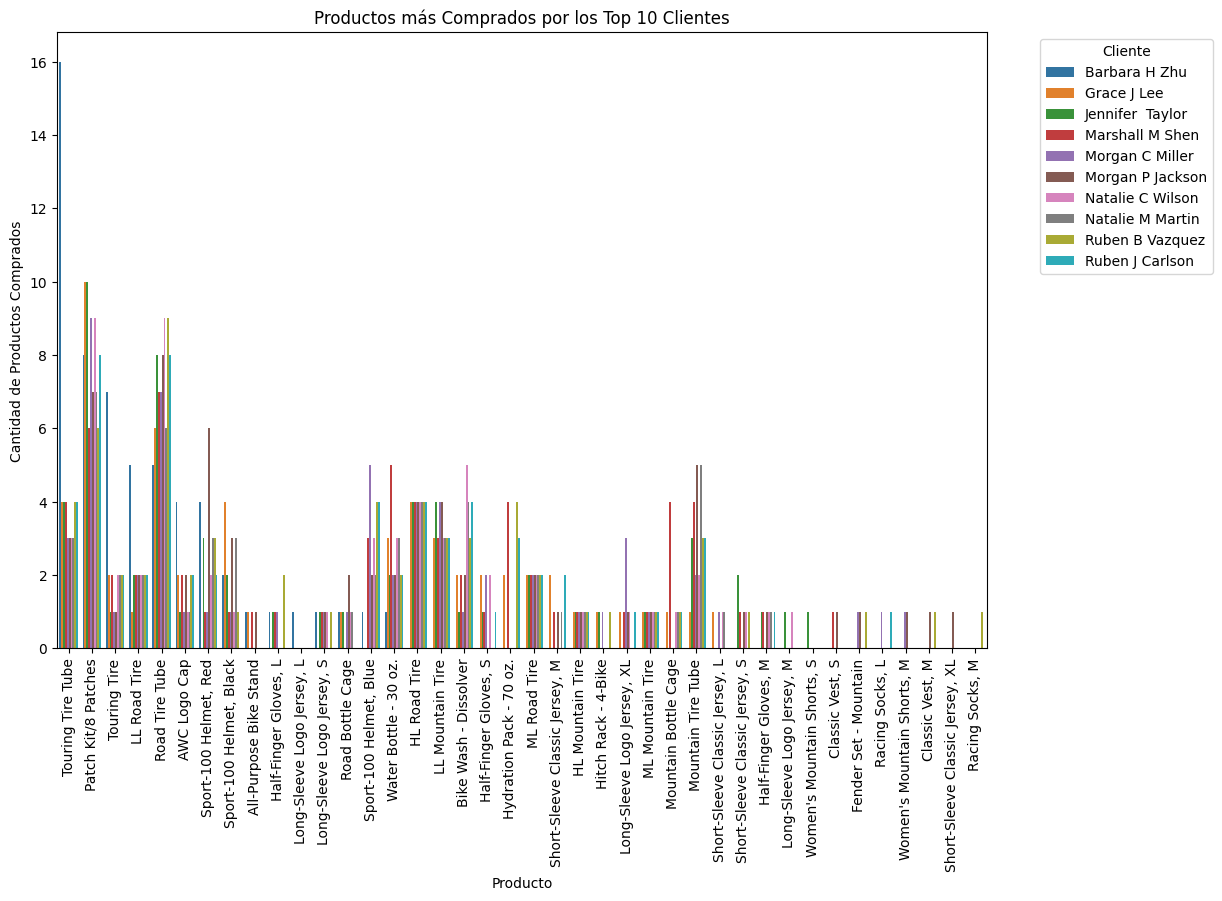

In [ ]:
# Filtrar solo los 10 principales clientes
top_customers = top_products_by_customers[top_products_by_customers['FullName'].isin(top_10_customers)]

# Graficar los productos más comprados por estos clientes
plt.figure(figsize=(12, 8))
sns.barplot(x='ProductName', y='OrderQty', hue='FullName', data=top_customers)
plt.title('Productos más Comprados por los Top 10 Clientes')
plt.xticks(rotation=90)
plt.ylabel('Cantidad de Productos Comprados')
plt.xlabel('Producto')
plt.legend(title='Cliente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


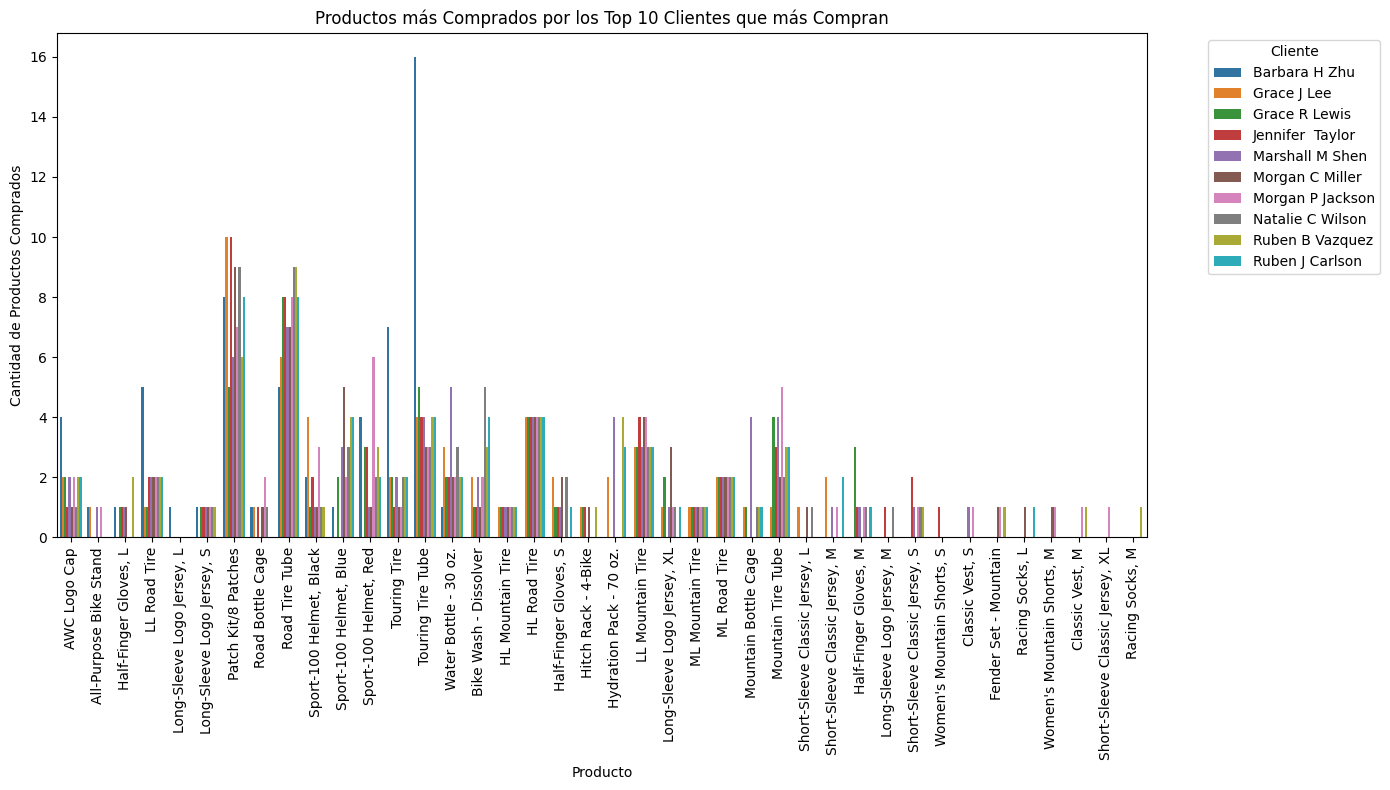

In [ ]:
# Obtener los 10 clientes que más han comprado en términos de cantidad de productos
top_10_customers = df.groupby('FullName')['OrderQty'].sum().sort_values(ascending=False).head(10).index

# Agrupar por 'FullName' y 'ProductName' para obtener la cantidad de productos comprados por cada cliente
products_by_customers = df.groupby(['FullName', 'ProductName'])['OrderQty'].sum().reset_index()

# Filtrar solo los 10 principales clientes
top_customers = products_by_customers[products_by_customers['FullName'].isin(top_10_customers)]

# Graficar los productos más comprados por estos 10 clientes
plt.figure(figsize=(14, 8))
sns.barplot(x='ProductName', y='OrderQty', hue='FullName', data=top_customers)
plt.title('Productos más Comprados por los Top 10 Clientes que más Compran')
plt.xticks(rotation=90)
plt.ylabel('Cantidad de Productos Comprados')
plt.xlabel('Producto')
plt.legend(title='Cliente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Obtener el cliente que más compra
top_customer = df.groupby('FullName')['OrderQty'].sum().idxmax()


In [ ]:
# Filtrar datos solo para el cliente que más compra
customer_data = df[df['FullName'] == top_customer]

# Calcular el número de compras y el periodo total de tiempo
num_purchases = customer_data['OrderQty'].sum()
num_months = customer_data['OrderDate'].dt.to_period('M').nunique()

# Tasa de compras (λ)
lambda_rate = num_purchases / num_months


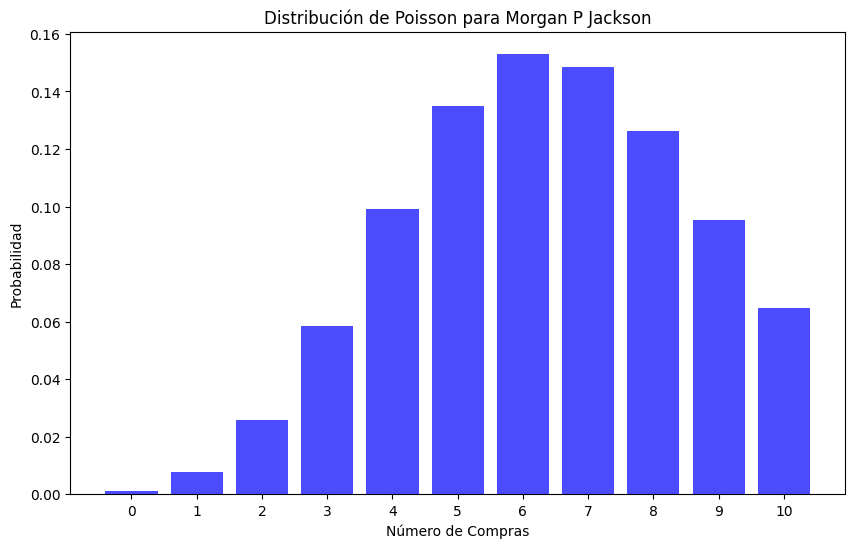

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Número de compras que queremos modelar (por ejemplo, 0 a 10)
x = np.arange(0, 11)

# Distribución de Poisson
poisson_probs = poisson.pmf(x, lambda_rate)

# Graficar la distribución de Poisson
plt.figure(figsize=(10, 6))
plt.bar(x, poisson_probs, color='blue', alpha=0.7)
plt.title(f'Distribución de Poisson para {top_customer}')
plt.xlabel('Número de Compras')
plt.ylabel('Probabilidad')
plt.xticks(x)
plt.show()


*calcular la probabilidad de que el cliente haga un número específico de compras en el próximo mes, o podemos generar una muestra de posibles resultados.*

## **1-. Regresion Lineal:**

---



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Seleccionar las columnas relevantes
X = df[['OrderQty', 'UnitPrice', 'UnitPriceDiscount']]
y = df['Profit']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo (R^2 score)
print(f'R^2: {model.score(X_test, y_test)}')


R^2: 0.9852868953279965


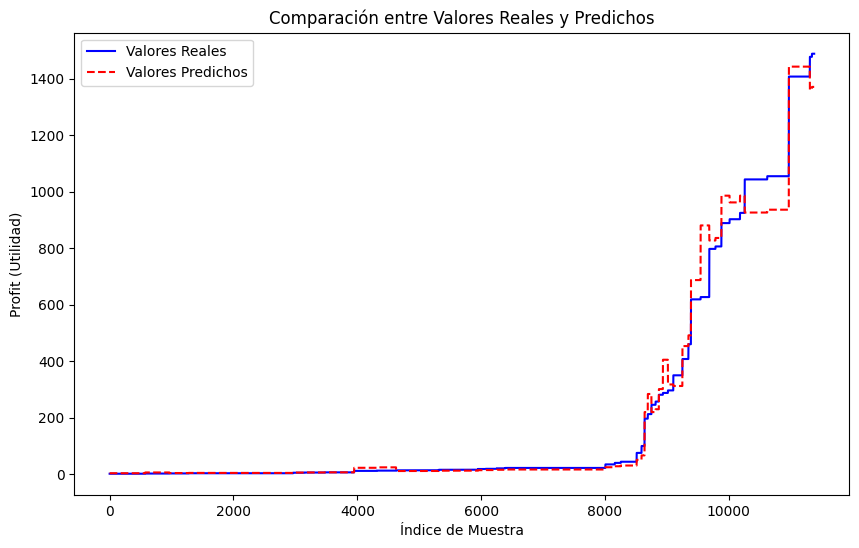

In [ ]:
# Convertir y_test a Numpy array si es necesario
y_test_np = np.array(y_test)

# Ordenar los valores para una mejor visualización
sorted_idx = np.argsort(y_test_np)

# Gráfica comparando los valores reales y predichos
plt.figure(figsize=(10, 6))

plt.plot(np.arange(len(y_test_np)), y_test_np[sorted_idx], label='Valores Reales', color='blue')
plt.plot(np.arange(len(y_test_np)), y_pred[sorted_idx], label='Valores Predichos', color='red', linestyle='--')

# Etiquetas y título
plt.title('Comparación entre Valores Reales y Predichos')
plt.xlabel('Índice de Muestra')
plt.ylabel('Profit (Utilidad)')
plt.legend()
plt.show()



*La gráfica muestra la comparación entre los valores reales y predichos de la variable Profit (Utilidad) en el conjunto de datos. Las líneas azul y roja representan los valores reales y los predichos, respectivamente. A lo largo de la mayoría de las muestras, el modelo de regresión lineal se ajusta de manera precisa, con las líneas de valores reales y predichos muy cercanas entre sí. Sin embargo, se observa un aumento más pronunciado en las últimas muestras, lo que podría indicar la presencia de valores extremos. En general, el alto valor de R² (0.98) sugiere que el modelo tiene un rendimiento adecuado para predecir la utilidad.*